In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load CSV file
df = pd.read_csv('C:/Users/Eric/Documents/Python/econ_dashboard/output/fetch_fred_data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[df['date'] >= '2004-01-01']
df = df.reset_index().set_index('date').drop(columns = 'index')

df

,GDP,Real Consumer Exp,Business Inv,Govt Expenditure,Net Exports,Imports,Exports,CPI,Real Disposable Income,Unemployment Rate,...,PPI Food Manufacture,PPI Grocery,"Import Index: Food, Feed, Bev",US Population,CPI (Food at Home),CPI (Food away from Home),Grocery Sales,Restaurant Sales,Grocery Units,Restaurant Units
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.300,11051.2,5.7,...,139.300,121.300,103.7,292046.0,183.300,184.900,36177.0,24355.0,197.364975,131.719849
2004-02-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.700,11071.0,5.6,...,140.400,125.700,105.3,292230.0,183.700,185.500,35445.0,24469.0,192.950463,131.908356
2004-03-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,187.100,11115.6,5.8,...,142.400,125.200,105.9,292434.0,184.100,185.800,35951.0,26533.0,195.279739,142.804090
2004-04-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,187.400,11153.3,5.6,...,146.100,123.100,107.2,292651.0,184.300,186.200,36120.0,26228.0,195.984807,140.859291
2004-05-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,188.200,11208.9,5.6,...,149.100,122.200,106.8,292872.0,186.600,186.700,36219.0,27309.0,194.099678,146.272094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,NaN,16360.1,NaN,NaN,NaN,NaN,NaN,319.615,17814.8,4.2,...,266.230,285.200,235.8,341729.0,312.713,378.363,75925.0,92223.0,242.794511,243.742121
2025-04-01,NaN,16375.4,NaN,NaN,NaN,NaN,NaN,320.321,17929.9,4.2,...,267.368,291.601,235.5,341874.0,311.331,380.039,75968.0,88371.0,244.010394,232.531398
2025-05-01,NaN,16330.0,NaN,NaN,NaN,NaN,NaN,320.580,17806.5,4.2,...,268.959,289.975,233.8,342032.0,312.158,381.228,75528.0,95640.0,241.954395,250.873493


In [37]:
df = df.rename(columns={
       "GDP": 'gdp',
        'Real Consumer Exp': 'cons_exp',
        'Business Inv': "bus_inv",
        'Govt Expenditure': 'govt_exp',
        'Net Exports': 'net_exp',
        'Imports': 'imports',
        'Exports': 'exports',
        'CPI': 'cpi',
        "Real Disposable Income": 'rdi',
        "Unemployment Rate": 'unrate',
        "Initial Jobless Claims": 'initial_claims',
        "Continued Jobless Claims": 'continued_claims',
        "Personal Savings": 'savings',
        "Consumer Debt % DI": 'cons_debt_di',
        "Credit Card Delinquency": 'credit_card_delinq',
        "Mortgage Delinquency": 'mortgage_delinq',
        "Consumer Sentiment": 'cons_sent',
        "Avg Home Price": 'home_price',        
        "US Population": 'us_population',
        "Oil Prices": 'oil_prices',        
        "PPI Farm Products": 'ppi_farm_products',
        "PPI Food Manufacture": 'ppi_food_mfg',
        "PPI Grocery": 'ppi_grocery',
        "Retail Wages": 'wages_retail',
        "Grocery Sales": 'grocery_sales',  
        "Restaurant Sales": 'restaurant_sales',    
        "CPI (Food at Home)": 'cpi_fah', 
        "CPI (Food away from Home)": 'cpi_fafh',
        "Grocery Units": "grocery_units",
        "Restaurant Units": "restaurant_units"
    })


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-01-01 to 2025-07-01
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gdp                            253 non-null    float64
 1   cons_exp                       221 non-null    float64
 2   bus_inv                        253 non-null    float64
 3   govt_exp                       253 non-null    float64
 4   net_exp                        253 non-null    float64
 5   imports                        241 non-null    float64
 6   exports                        253 non-null    float64
 7   cpi                            258 non-null    float64
 8   rdi                            257 non-null    float64
 9   unrate                         258 non-null    float64
 10  initial_claims                 259 non-null    int64  
 11  continued_claims               259 non-null    int64  
 12  savings                        

In [39]:
rdi = pd.read_excel('C:/Users/Eric/Documents/Python/grocery_fcst/data/RDI Analysis.xlsx')
rdi = rdi.set_index('observation_date')
rdi = rdi[['RDI_adj']]
rdi = rdi.rename(columns={'RDI_adj':'rdi_adj'})
rdi = rdi[(rdi.index >= '2004-01-01') & (rdi.index <= '2025-01-31')]
rdi

,rdi_adj
observation_date,
2017-01-01,NaN
2017-02-01,NaN
2017-03-01,NaN
2017-04-01,NaN
2017-05-01,NaN
...,...
2024-09-01,17568.105191
2024-10-01,17469.080556
2024-11-01,17592.400000


In [40]:
df = pd.merge(df, rdi, left_index=True, right_index=True, how='left')
df['grocery_sales_lag1'] = df['grocery_sales'].shift(1)
df

,gdp,cons_exp,bus_inv,govt_exp,net_exp,imports,exports,cpi,rdi,unrate,...,"Import Index: Food, Feed, Bev",us_population,cpi_fah,cpi_fafh,grocery_sales,restaurant_sales,grocery_units,restaurant_units,rdi_adj,grocery_sales_lag1
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.300,11051.2,5.7,...,103.7,292046.0,183.300,184.900,36177.0,24355.0,197.364975,131.719849,NaN,NaN
2004-02-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.700,11071.0,5.6,...,105.3,292230.0,183.700,185.500,35445.0,24469.0,192.950463,131.908356,NaN,36177.0
2004-03-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,187.100,11115.6,5.8,...,105.9,292434.0,184.100,185.800,35951.0,26533.0,195.279739,142.804090,NaN,35445.0
2004-04-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,187.400,11153.3,5.6,...,107.2,292651.0,184.300,186.200,36120.0,26228.0,195.984807,140.859291,NaN,35951.0
2004-05-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,188.200,11208.9,5.6,...,106.8,292872.0,186.600,186.700,36219.0,27309.0,194.099678,146.272094,NaN,36120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,NaN,16360.1,NaN,NaN,NaN,NaN,NaN,319.615,17814.8,4.2,...,235.8,341729.0,312.713,378.363,75925.0,92223.0,242.794511,243.742121,NaN,75997.0
2025-04-01,NaN,16375.4,NaN,NaN,NaN,NaN,NaN,320.321,17929.9,4.2,...,235.5,341874.0,311.331,380.039,75968.0,88371.0,244.010394,232.531398,NaN,75925.0
2025-05-01,NaN,16330.0,NaN,NaN,NaN,NaN,NaN,320.580,17806.5,4.2,...,233.8,342032.0,312.158,381.228,75528.0,95640.0,241.954395,250.873493,NaN,75968.0


### Describe the Data ###

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-01-01 to 2025-07-01
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gdp                            253 non-null    float64
 1   cons_exp                       221 non-null    float64
 2   bus_inv                        253 non-null    float64
 3   govt_exp                       253 non-null    float64
 4   net_exp                        253 non-null    float64
 5   imports                        241 non-null    float64
 6   exports                        253 non-null    float64
 7   cpi                            258 non-null    float64
 8   rdi                            257 non-null    float64
 9   unrate                         258 non-null    float64
 10  initial_claims                 259 non-null    int64  
 11  continued_claims               259 non-null    int64  
 12  savings                        

In [42]:
print(df.index)

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
               '2025-06-01', '2025-07-01'],
              dtype='datetime64[ns]', name='date', length=259, freq=None)


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,253.0,1.875028e+04,2.325046e+03,1.524868e+04,1.680959e+04,1.840694e+04,2.060228e+04,2.354235e+04
cons_exp,221.0,1.307984e+04,1.643473e+03,1.106800e+04,1.154230e+04,1.279870e+04,1.414280e+04,1.637540e+04
bus_inv,253.0,5.057322e+02,2.347918e+02,-1.471210e+02,3.944210e+02,5.054840e+02,6.394210e+02,1.073762e+03
govt_exp,253.0,6.644117e+03,1.883694e+03,3.947702e+03,5.641212e+03,6.043884e+03,7.489057e+03,1.118667e+04
net_exp,253.0,-6.043773e+02,2.347253e+02,-1.358997e+03,-7.201540e+02,-5.584870e+02,-3.974830e+02,-2.755520e+02
imports,241.0,2.662404e+03,4.341877e+02,2.031762e+03,2.325403e+03,2.623351e+03,3.049962e+03,3.640014e+03
exports,253.0,2.105814e+03,3.596864e+02,1.339286e+03,1.836914e+03,2.233569e+03,2.390257e+03,2.639879e+03
cpi,258.0,2.416257e+02,3.529235e+01,1.863000e+02,2.166305e+02,2.366930e+02,2.576980e+02,3.215000e+02
rdi,257.0,1.406077e+04,2.066107e+03,1.105120e+04,1.228020e+04,1.355070e+04,1.576690e+04,2.044580e+04
unrate,258.0,5.766279e+00,2.079562e+00,3.400000e+00,4.200000e+00,5.000000e+00,7.125000e+00,1.480000e+01


### Missing Values, Duplicates, and Outliers ###

In [44]:
# Count total missing values per column
missing_counts = df.isna().sum()

# Show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

missing_counts

gdp                                6
cons_exp                          38
bus_inv                            6
govt_exp                           6
net_exp                            6
imports                           18
exports                            6
cpi                                1
rdi                                2
unrate                             1
savings                            2
cons_debt_di                       6
credit_card_delinq                 6
mortgage_delinq                    6
cons_sent                          2
home_price                         3
ppi_farm_products                  1
ppi_food_mfg                       1
ppi_grocery                        1
Import Index: Food, Feed, Bev      1
us_population                      2
cpi_fah                            1
cpi_fafh                           1
grocery_sales                      1
restaurant_sales                   2
grocery_units                      1
restaurant_units                   2
r

In [45]:
#fill in missing values
df = df.ffill()
df['grocery_sales_lag1'] = df['grocery_sales_lag1'].bfill()

In [46]:
# Count total missing values per column
missing_counts = df.isna().sum()

# Show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

missing_counts

cons_exp     36
rdi_adj     195
dtype: int64

In [47]:
# Check for duplicates
df.duplicated().sum()

0

In [48]:
# Identify outliers using IQR
cols = df.columns.tolist()

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

IQR_df = pd.DataFrame(
    {'Column': Q1.index,                        # Column names
    'Q1 (25th percentile)': Q1.values,          # Q1 values
    'Q3 (75th percentile)': Q3.values,          # Q3 values
    'IQR': IQR.values,                          # Interquartile range
    'Lower Whisker': lower_whisker.values,      # Lower whisker
    'Upper Whisker': upper_whisker.values})      # Upper whisker

#This provides the percent of values above or below the whiskers
((df[cols] < lower_whisker) | (df[cols] > upper_whisker)).sum() / len(df) * 100

gdp                               0.000000
cons_exp                          0.000000
bus_inv                           5.019305
govt_exp                          6.177606
net_exp                           2.702703
imports                           0.000000
exports                           0.000000
cpi                               1.544402
rdi                               0.000000
unrate                            0.772201
initial_claims                    6.949807
continued_claims                  6.177606
savings                           6.177606
cons_debt_di                      0.000000
credit_card_delinq                3.474903
mortgage_delinq                   0.000000
cons_sent                         0.000000
home_price                       12.741313
oil_prices                        0.000000
ppi_farm_products                 0.000000
ppi_food_mfg                      6.949807
ppi_grocery                       0.000000
Import Index: Food, Feed, Bev     0.000000
us_populati

### Visualizations ###

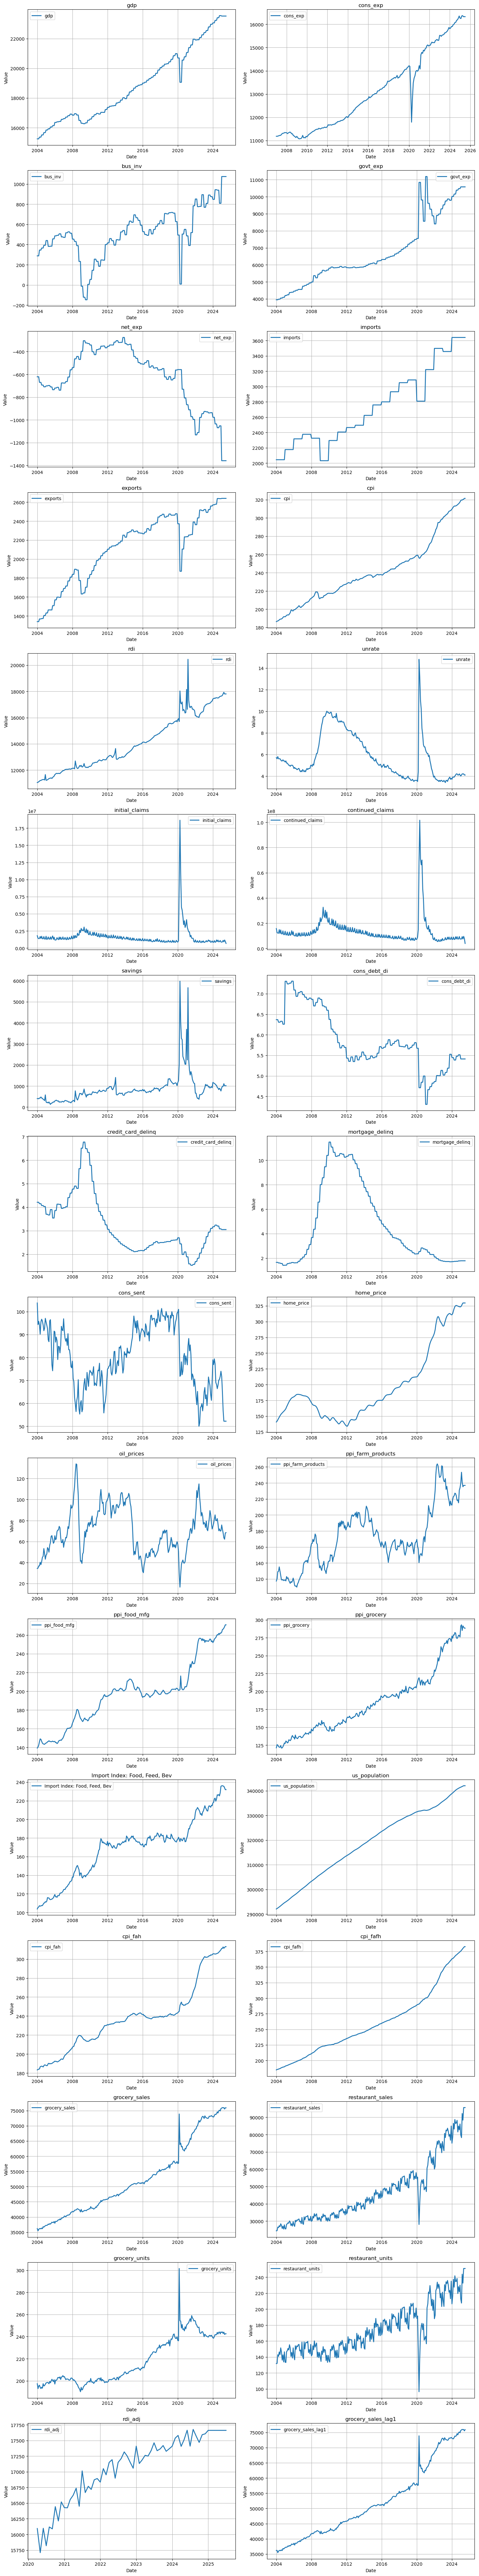

In [49]:
# Select the variables to plot (excluding 'date')
var_list = df.columns.tolist()

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot
for i, col in enumerate(var_list):
    ax = axes[i]  # Select the subplot
    ax.plot(df.index, df[col], label=col, linewidth=2)
    
    # Customize the subplot
    ax.set_title(col, fontsize=12)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Value", fontsize=10)
    ax.grid(True)
    ax.legend()

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


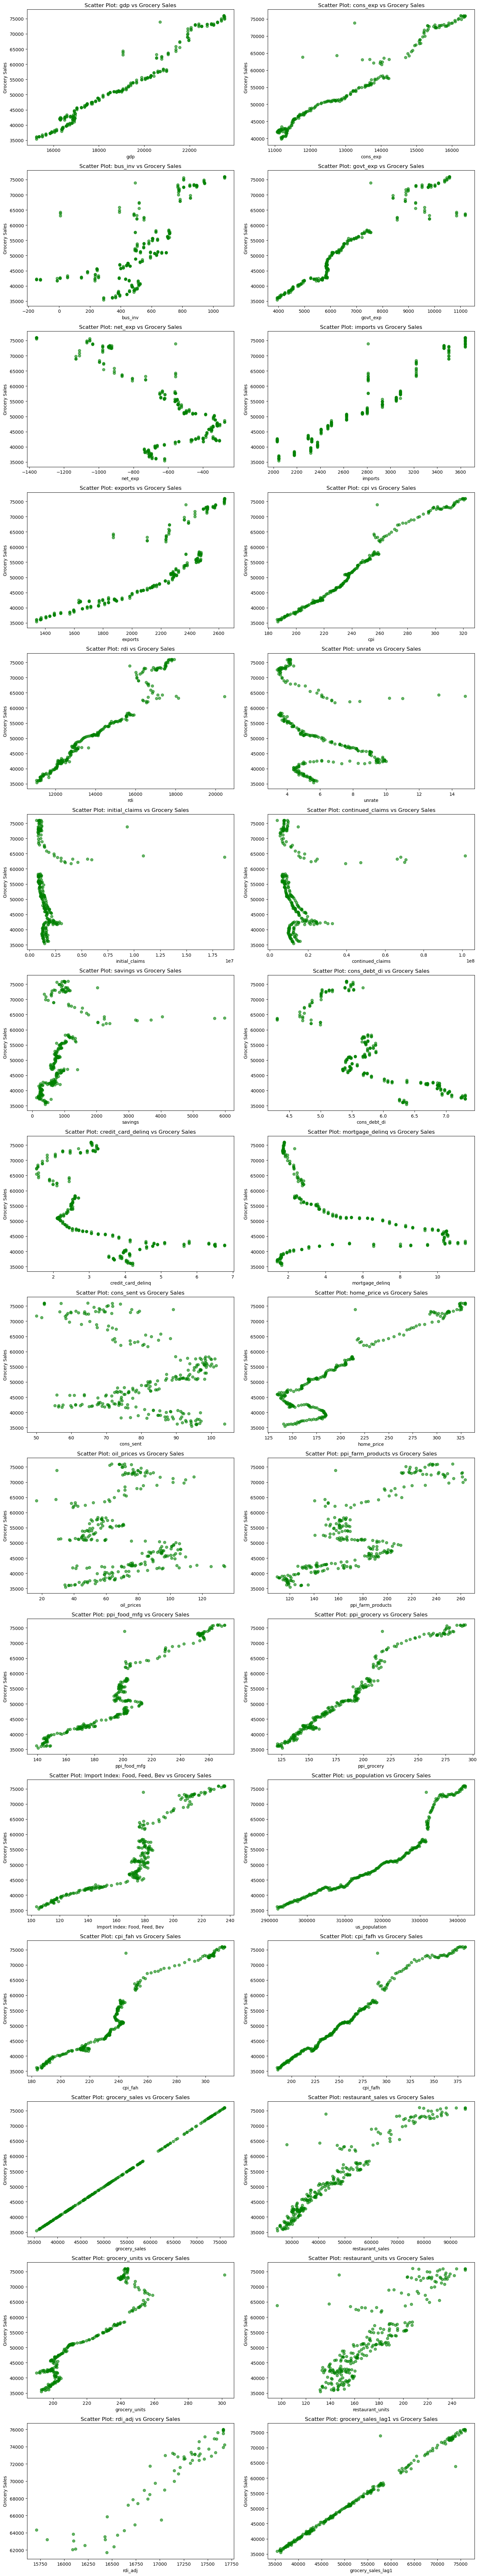

In [50]:
# Select independent variables (excluding index)
var_list = df.columns.tolist()  # Since 'date' is index, it's not included

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and create scatter plots
for i, col in enumerate(var_list):
    ax = axes[i]
    ax.scatter(df[col], df['grocery_sales'], color='green', alpha=0.6)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Grocery Sales', fontsize=10)
    ax.set_title(f'Scatter Plot: {col} vs Grocery Sales')

# Hide empty subplots if `var_list` has an odd number of elements
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


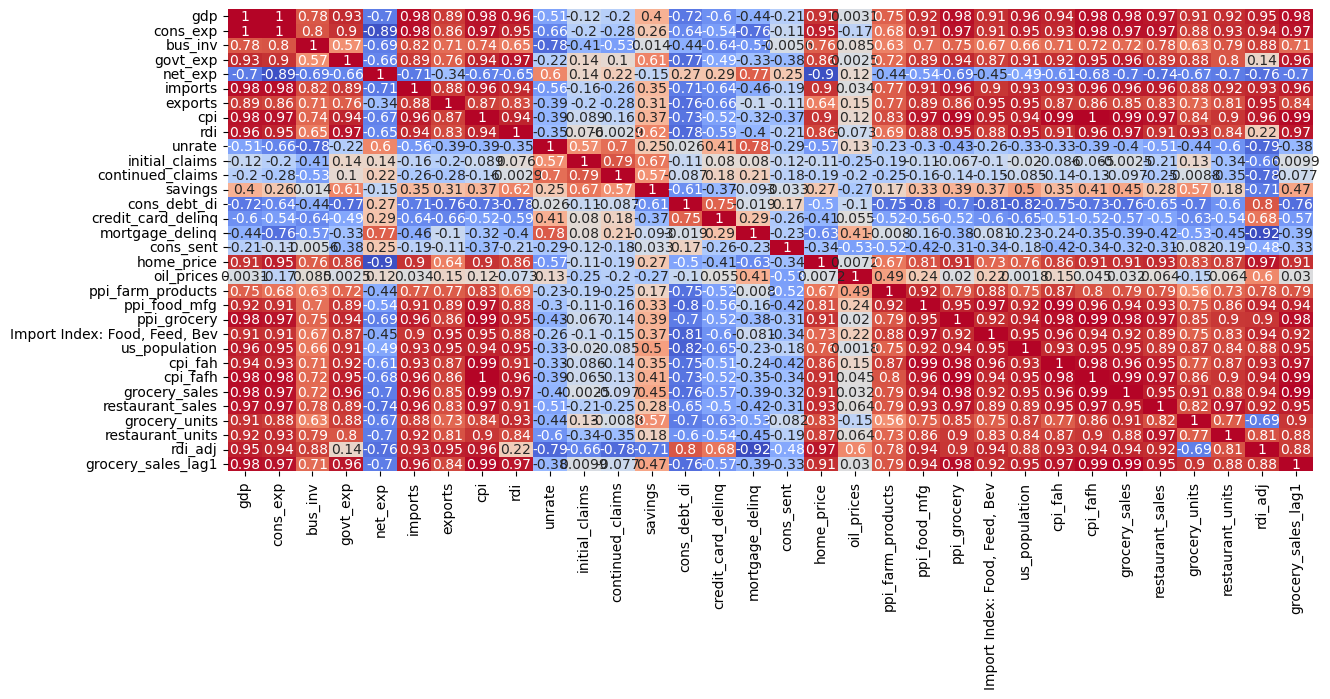

In [51]:
# Compute the correlation matrix
df_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 6))
sns.heatmap(df_corr, annot=True, cbar=False, cmap="coolwarm")
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-01-01 to 2025-07-01
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gdp                            259 non-null    float64
 1   cons_exp                       223 non-null    float64
 2   bus_inv                        259 non-null    float64
 3   govt_exp                       259 non-null    float64
 4   net_exp                        259 non-null    float64
 5   imports                        259 non-null    float64
 6   exports                        259 non-null    float64
 7   cpi                            259 non-null    float64
 8   rdi                            259 non-null    float64
 9   unrate                         259 non-null    float64
 10  initial_claims                 259 non-null    int64  
 11  continued_claims               259 non-null    int64  
 12  savings                        

### Feature Creation ###

In [53]:
#feature creation

# Create first difference variables (applies to all numeric columns)
df_diff = df.diff().add_suffix('_diff')
df_diff = df_diff.bfill()

# Create YOY variables (applies to all numeric columns)
df_yoy = df.pct_change(periods=12, fill_method=None).add_suffix('_yoy') * 100  # Converts to percentage

# Create dummy1 for dates between 2/29/2020 and 4/30/2020. A boolean consition with a .astype(int) will return a 1 for True and 0 for false
df['covid1'] = ((df.index >= '2020-02-01') & (df.index <= '2020-04-01')).astype(int)

# Create dummy2 for dates between 5/31/2020 and 10/31/2020
df['covid2'] = ((df.index >= '2020-05-01') & (df.index <= '2020-10-01')).astype(int)

# reduce grocery sales for March 2020
df.loc[df.index == '2020-03-01', 'grocery_sales'] = 61000 

In [54]:
df = pd.concat([df, df_diff, df_yoy], axis=1)

In [55]:
for col in df.columns:
    print(col)

gdp
cons_exp
bus_inv
govt_exp
net_exp
imports
exports
cpi
rdi
unrate
initial_claims
continued_claims
savings
cons_debt_di
credit_card_delinq
mortgage_delinq
cons_sent
home_price
oil_prices
ppi_farm_products
ppi_food_mfg
ppi_grocery
Import Index: Food, Feed, Bev
us_population
cpi_fah
cpi_fafh
grocery_sales
restaurant_sales
grocery_units
restaurant_units
rdi_adj
grocery_sales_lag1
covid1
covid2
gdp_diff
cons_exp_diff
bus_inv_diff
govt_exp_diff
net_exp_diff
imports_diff
exports_diff
cpi_diff
rdi_diff
unrate_diff
initial_claims_diff
continued_claims_diff
savings_diff
cons_debt_di_diff
credit_card_delinq_diff
mortgage_delinq_diff
cons_sent_diff
home_price_diff
oil_prices_diff
ppi_farm_products_diff
ppi_food_mfg_diff
ppi_grocery_diff
Import Index: Food, Feed, Bev_diff
us_population_diff
cpi_fah_diff
cpi_fafh_diff
grocery_sales_diff
restaurant_sales_diff
grocery_units_diff
restaurant_units_diff
rdi_adj_diff
grocery_sales_lag1_diff
gdp_yoy
cons_exp_yoy
bus_inv_yoy
govt_exp_yoy
net_exp_yoy
impo

In [56]:
df.to_csv('C:/Users/Eric/Documents/Python/grocery_fcst/output/grocery_eda_dataset.csv', index = True)